In [6]:
import pandas as pd  # Para manipulação de dados
import matplotlib.pyplot as plt  # Para plotagem de gráficos
import seaborn as sns  # Para plotagem de gráficos avançados
from sklearn.preprocessing import LabelEncoder
from itertools import cycle


# Importando as métricas e funções de avaliação do scikit-learn
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

# Importando os modelos de machine learning do scikit-learn
from sklearn.model_selection import train_test_split  # Para dividir os dados em treino e teste
from sklearn.linear_model import LogisticRegression  # Regressão Logística
from sklearn.neighbors import KNeighborsClassifier  # K-Vizinhos Mais Próximos
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [7]:
# Define o número máximo de colunas e a largura máxima das colunas para None
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [8]:
# Carrega os dados de um arquivo CSV em um DataFrame.
var_dfPrincipal = pd.read_csv(r"C:\Users\Gustavo\Desktop\Facens\TCC\Modelos\INFLUD22-03-04-2023.csv", delimiter=';')

# Exibe um resumo das informações do DataFrame, incluindo o tipo de dados e o número de valores não nulos em cada coluna.
var_dfPrincipal.info()

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_13392\139083432.py:2: DtypeWarning: Columns (15,53,59,61,62,63,91,93,120,122,143,171) have mixed types. Specify dtype option on import or set low_memory=False.
  var_dfPrincipal = pd.read_csv(r"C:\Users\Gustavo\Desktop\Facens\TCC\Modelos\INFLUD22-03-04-2023.csv", delimiter=';')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557476 entries, 0 to 557475
Columns: 173 entries, DT_NOTIFIC to DT_TRT_COV
dtypes: float64(95), int64(12), object(66)
memory usage: 735.8+ MB


In [9]:
var_dfPrincipal.shape

(557476, 173)

In [10]:
#Exibe as 5 primeiras linhas
var_dfPrincipal.head()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ESCOL_N,ID_PAIS,CO_PAIS,SG_UF,ID_RG_RESI,CO_RG_RESI,ID_MN_RESI,CO_MUN_RES,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,OUTRO_DES,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OBES_IMC,OUT_MORBI,MORB_DESC,VACINA,DT_UT_DOSE,MAE_VAC,DT_VAC_MAE,M_AMAMENTA,DT_DOSEUNI,DT_1_DOSE,DT_2_DOSE,ANTIVIRAL,TP_ANTIVIR,OUT_ANTIV,DT_ANTIVIR,HOSPITAL,DT_INTERNA,SG_UF_INTE,ID_RG_INTE,CO_RG_INTE,ID_MN_INTE,CO_MU_INTE,UTI,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,RAIOX_RES,RAIOX_OUT,DT_RAIOX,AMOSTRA,DT_COLETA,TP_AMOSTRA,OUT_AMOST,PCR_RESUL,DT_PCR,POS_PCRFLU,TP_FLU_PCR,PCR_FLUASU,FLUASU_OUT,PCR_FLUBLI,FLUBLI_OUT,POS_PCROUT,PCR_VSR,PCR_PARA1,PCR_PARA2,PCR_PARA3,PCR_PARA4,PCR_ADENO,PCR_METAP,PCR_BOCA,PCR_RINO,PCR_OUTRO,DS_PCR_OUT,CLASSI_FIN,CLASSI_OUT,CRITERIO,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,DT_DIGITA,HISTO_VGM,PAIS_VGM,CO_PS_VGM,LO_PS_VGM,DT_VGM,DT_RT_VGM,PCR_SARS2,PAC_COCBO,PAC_DSCBO,OUT_ANIM,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,TOMO_OUT,DT_TOMO,TP_TES_AN,DT_RES_AN,RES_AN,POS_AN_FLU,TP_FLU_AN,POS_AN_OUT,AN_SARS2,AN_VSR,AN_PARA1,AN_PARA2,AN_PARA3,AN_ADENO,AN_OUTRO,DS_AN_OUT,TP_AM_SOR,SOR_OUT,DT_CO_SOR,TP_SOR,OUT_SOR,DT_RES,RES_IGG,RES_IGM,RES_IGA,ESTRANG,VACINA_COV,DOSE_1_COV,DOSE_2_COV,DOSE_REF,FAB_COV_1,FAB_COV_2,FAB_COVREF,LAB_PR_COV,LOTE_1_COV,LOTE_2_COV,LOTE_REF,FNT_IN_COV,DOSE_2REF,FAB_COVRF2,LOTE_REF2,TRAT_COV,TIPO_TRAT,OUT_TRAT,DT_TRT_COV
0,05/01/2022,1,02/01/2022,1,RJ,NaN,NaN,RIO DE JANEIRO,330455,SMS UPA 24H MAGALHAES BASTOS AP 51,7101856,M,09/02/1998,23,3,3023,6,4,NaN,BRASIL,1,RJ,NaN,NaN,RIO DE JANEIRO,330455.0,NaN,NaN,NaN,NaN,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,05/01/2022,RJ,NaN,NaN,RIO DE JANEIRO,330455.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,05/01/2022,4.0,OROFARINGE,2.0,10/01/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,3.0,1.0,05/01/2022,07/01/2022,05/01/2022,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,25/01/2021,22/02/2021,NaN,86 - COVID-19 SINOVAC/BUTANTAN - CORONAVAC,NaN,NaN,86 - COVID-19 SINOVAC/BUTANTAN - CORONAVAC,202010019,210017,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04/01/2022,1,03/01/2022,1,MS,NRS DE DOURADOS,1966.0,DOURADOS,500370,HOSPITAL EVANGELICO DR SRA GOLDSBY KING,2371375,F,30/07/1984,37,3,3037,5,4,3.0,BRASIL,1,MS,NRS DE DOURADOS,1966.0,DOURADOS,500370.0,1.0,NaN,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,1.0,04/01/2022,MS,NRS DE DOURADOS,1966.0,DOURADOS,500370.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,1.0,04/01/2022,1.0,NaN,1.0,08/01/2022,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,1.0,06/01/2022,10/01/2022,06/01/2022,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2.0,2.0,NaN,NaN,NaN,2.0,04/01/2022,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,07/06/2021,10/09/2021,NaN,87 - COVID-19 PFIZER - COMIRNATY,NaN,NaN,87 - COVID-19 PFIZER - COMIRNATY,FC2495,FF8844,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,07/01/2022,1,04/01/2022,1,GO,SAO PATRICIO,1791.0,RUBIATABA,521890,HOSPITAL MUNICIPAL DE RUBIATABA,5584108,F,01/03/1988,33,3,3033,5,4,4.0,BRASIL,1,GO,SAO PATRICIO,1791.0,RUBIATABA,521890.0,1.0,NaN,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,07/01/2022,GO,SAO PATRICIO,1791.0,RUBIATABA,521890.0,2.0,NaN,NaN,3.0,NaN,NaN,NaN,1.0,07/01/2022,1.0,NaN,2.0,

# Cleaning

In [11]:
# Calcula a porcentagem de valores nulos em cada coluna.
var_floatPorcentagemNulo = var_dfPrincipal.isnull().mean() * 100

# Seleciona as colunas com mais de 80% de valores nulos.
var_srColunasAltaPorcentagemNulo = var_floatPorcentagemNulo[var_floatPorcentagemNulo > 80]
print(var_srColunasAltaPorcentagemNulo)

# Cria um novo DataFrame com as colunas selecionadas e suas porcentagens de valores nulos.
var_dfColunasAltaPorcentagemNulo = pd.DataFrame(var_srColunasAltaPorcentagemNulo, columns=['Porcentagem de Nulos'])

# Exibe o novo DataFrame.
print(var_dfColunasAltaPorcentagemNulo)

SURTO_SG      100.000000
OBES_IMC       99.594960
DT_UT_DOSE     96.636806
MAE_VAC        97.234679
DT_VAC_MAE     99.894704
                 ...    
LOTE_REF2      94.902920
TRAT_COV       82.913525
TIPO_TRAT      99.811292
OUT_TRAT       99.885197
DT_TRT_COV    100.000000
Length: 71, dtype: float64
            Porcentagem de Nulos
SURTO_SG              100.000000
OBES_IMC               99.594960
DT_UT_DOSE             96.636806
MAE_VAC                97.234679
DT_VAC_MAE             99.894704
...                          ...
LOTE_REF2              94.902920
TRAT_COV               82.913525
TIPO_TRAT              99.811292
OUT_TRAT               99.885197
DT_TRT_COV            100.000000

[71 rows x 1 columns]


In [12]:
var_dfColunasAltaPorcentagemNulo.sort_values(by='Porcentagem de Nulos')

,Porcentagem de Nulos
POS_PCRFLU,80.114660
PCR_SARS2,81.155063
POS_AN_OUT,81.286728
DT_TOMO,82.426508
AN_SARS2,82.744728
...,...
CO_PS_VGM,100.000000
DT_VGM,100.000000
LO_PS_VGM,100.000000
SURTO_SG,100.000000


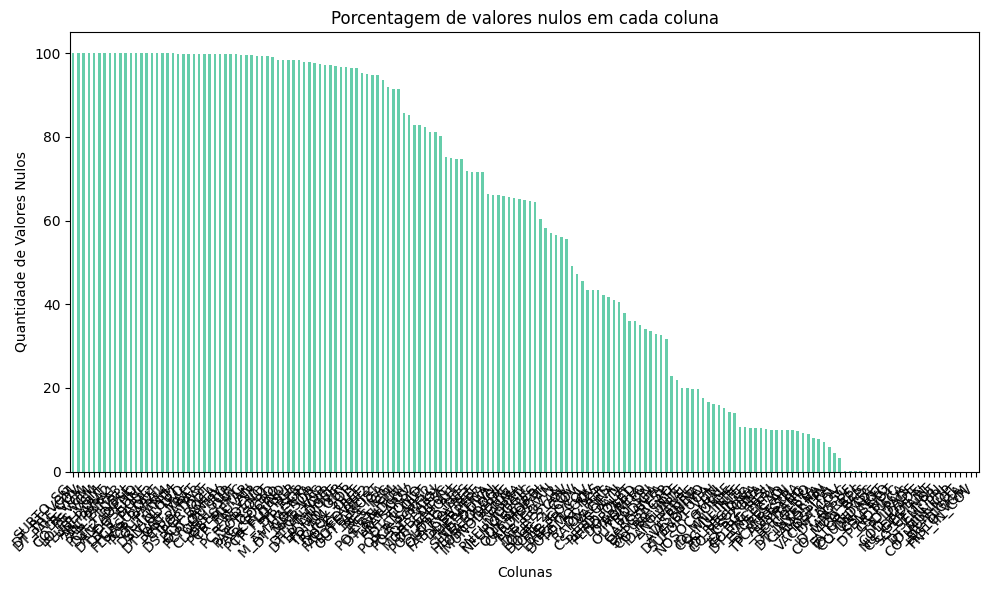

In [13]:
# Cria um gráfico de barras mostrando a quantidade de nulos que cada coluna tem
var_intNumeroNulos = (var_dfPrincipal.isnull().mean()* 100).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
var_intNumeroNulos.plot(kind='bar', color='mediumaquamarine')
plt.title('Porcentagem de valores nulos em cada coluna')
plt.xlabel('Colunas')
plt.ylabel('Quantidade de Valores Nulos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


removendo as colunas que tem mais de 80% dos dados nulos

In [14]:
# Cria uma cópia do DataFrame principal para evitar modificar o original.
var_dfCopia = var_dfPrincipal.copy()

# Calcula a porcentagem de valores nulos em cada coluna no DataFrame copiado.
var_srColunasAltaPorcentagemNulo = var_dfCopia.isnull().mean() * 100

# Seleciona as colunas com mais de 80% de valores nulos.
columns_to_drop = var_srColunasAltaPorcentagemNulo[var_srColunasAltaPorcentagemNulo > 80].index.tolist()
# print(columns_to_drop)  # Descomente esta linha para verificar as colunas que serão removidas.

# Remove as colunas selecionadas do DataFrame copiado.
var_dfCopia.drop(columns=columns_to_drop, inplace=True)

# Exibe um resumo das informações do DataFrame copiado após a remoção das colunas,
# incluindo o tipo de dados e o número de valores não nulos em cada coluna.
var_dfCopia.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557476 entries, 0 to 557475
Columns: 102 entries, DT_NOTIFIC to FNT_IN_COV
dtypes: float64(53), int64(12), object(37)
memory usage: 433.8+ MB


Vamos analisar agora a coluna De target e filtrar por ela os valores nulos

In [15]:
# ------------||-------------------
# Mostrando os nulos da coluna target
var_dfCopia['CLASSI_FIN'].isna().mean()

np.float64(0.05854781192374201)

In [16]:
# Retirando os nulos da coluna de classificação final
var_dfFiltrada = var_dfCopia.dropna(subset=['CLASSI_FIN']).copy()

In [17]:
# Verificando a quantidade de nulos das colunas, ordenando do maior para o menor
var_dfFiltrada.isna().sum().sort_values(ascending=False)

DT_ENTUTI     390201
DT_RAIOX      390083
MORB_DESC     389743
POS_PCROUT    383536
LOTE_REF      374623
               ...  
FATOR_RISC         0
DT_DIGITA          0
HISTO_VGM          0
CLASSI_FIN         0
FNT_IN_COV         0
Length: 102, dtype: int64

Removendo as linhas inteiramente nulas

In [18]:
# Remove as linhas que têm todos os valores nulos do DataFrame filtrado.
var_dfFiltrada.dropna(how='all', inplace=True)

# Calcula o número de valores nulos em cada coluna do DataFrame filtrado e ordena em ordem decrescente.
var_srQuantidadeNulos = var_dfFiltrada.isna().sum().sort_values(ascending=False)

# Exibe a série com a contagem de valores nulos em cada coluna, ordenada de forma decrescente.
print(var_srQuantidadeNulos)


DT_ENTUTI     390201
DT_RAIOX      390083
MORB_DESC     389743
POS_PCROUT    383536
LOTE_REF      374623
               ...  
FATOR_RISC         0
DT_DIGITA          0
HISTO_VGM          0
CLASSI_FIN         0
FNT_IN_COV         0
Length: 102, dtype: int64


In [19]:
# Exibe um resumo das informações do DataFrame filtrado.
# O parâmetro 'max_cols' é definido para mostrar até 107 colunas no resumo.
var_dfFiltrada.info(max_cols=107)

<class 'pandas.core.frame.DataFrame'>
Index: 524837 entries, 0 to 557475
Data columns (total 102 columns):
 #    Column      Non-Null Count   Dtype  
---   ------      --------------   -----  
 0    DT_NOTIFIC  524837 non-null  object 
 1    SEM_NOT     524837 non-null  int64  
 2    DT_SIN_PRI  524837 non-null  object 
 3    SEM_PRI     524837 non-null  int64  
 4    SG_UF_NOT   524837 non-null  object 
 5    ID_REGIONA  468509 non-null  object 
 6    CO_REGIONA  468509 non-null  float64
 7    ID_MUNICIP  524837 non-null  object 
 8    CO_MUN_NOT  524837 non-null  int64  
 9    ID_UNIDADE  524837 non-null  object 
 10   CO_UNI_NOT  524837 non-null  int64  
 11   CS_SEXO     524837 non-null  object 
 12   DT_NASC     524654 non-null  object 
 13   NU_IDADE_N  524837 non-null  int64  
 14   TP_IDADE    524837 non-null  int64  
 15   COD_IDADE   524837 non-null  object 
 16   CS_GESTANT  524837 non-null  int64  
 17   CS_RACA     524837 non-null  int64  
 18   CS_ESCOL_N  332500 non-null

In [20]:
# Quantidade de linhas duplicadas
var_dfFiltrada.duplicated().sum()

np.int64(12)

Removendo as linhas duplicadas

In [21]:
var_dfFiltrada.drop_duplicates(inplace=True)

### Tratando as colunas

Ajustando os valores de colunas que tem dados nulos para o valor de 9.0 que é ignorado

In [22]:
# Lista de colunas a serem tratadas no DataFrame.
var_listColunasTratar = [
      'PUERPERA', 'SURTO_SG', 'GARGANTA', 'DIARREIA', 'VOMITO',
      'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA',
      'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL',
      'OBESIDADE', 'OUT_MORBI', 'VACINA', 'ANTIVIRAL',
      'POS_PCRFLU', 'POS_PCROUT', 'DOR_ABD', 'FADIGA', 'PERD_OLFT',
      'PERD_PALA', 'TRAT_COV', 'CO_DETEC', 'CS_ESCOL_N', 'ESTRANG',
      'RES_AN', 'TP_TES_AN', 'TOMO_RES'
]

# Itera sobre cada coluna na lista de colunas a serem tratadas.
for coluna in var_listColunasTratar:
    try:
        # Calcula a frequência de cada valor na coluna.
        var_intFrequencia = var_dfFiltrada[coluna].value_counts()

        # Conta o número total de registros não nulos na coluna.
        var_intTotalRegistro = var_dfFiltrada[coluna].count()

        # Calcula a porcentagem de cada valor em relação ao total de registros.
        var_intPorcetagens = (var_intFrequencia / var_intTotalRegistro) * 100

        # Exibe as porcentagens calculadas para a coluna.
        print(f'\n\nPorcentagens -- {coluna}  - \n{var_intPorcetagens}:\n')

        # Substitui os valores 6.0 por 9 na coluna.
        var_dfFiltrada[coluna].replace(6.0, 9, inplace=True)

        # Preenche os valores vazios (NaN) com 9 na coluna.
        var_dfFiltrada[coluna].fillna(value=9, inplace=True)

        # Exibe as estatísticas descritivas da coluna após o tratamento.
        print('\n\n', var_dfFiltrada[coluna].describe())

    except Exception as e:
        # Exibe uma mensagem de erro se houver uma exceção ao processar a coluna.
        print(f'Coluna que deu erro: {coluna} - {e}')




Porcentagens -- PUERPERA  - 
PUERPERA
2.0    97.344367
9.0     1.473901
1.0     1.181732
Name: count, dtype: float64:



 count    524825.000000
mean          6.580536
std           3.334002
min           1.000000
25%           2.000000
50%           9.000000
75%           9.000000
max           9.000000
Name: PUERPERA, dtype: float64
Coluna que deu erro: SURTO_SG - 'SURTO_SG'


Porcentagens -- GARGANTA  - 
GARGANTA
2.0    77.993332
1.0    19.219109
9.0     2.787559
Name: count, dtype: float64:



 count    524825.000000
mean          4.153646
std           3.391502
min           1.000000
25%           2.000000
50%           2.000000
75%           9.000000
max           9.000000
Name: GARGANTA, dtype: float64


Porcentagens -- DIARREIA  - 
DIARREIA
2.0    86.684417
1.0    11.235386
9.0     2.080197
Name: count, dtype: float64:



 count    524825.000000
mean          4.308453
std           3.381646
min           1.000000
25%           2.000000
50%           2.000000
75%           9.0

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_13392\3251313976.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  var_dfFiltrada[coluna].replace(6.0, 9, inplace=True)
C:\Users\Gustavo\AppData\Local\Temp\ipykernel_13392\3251313976.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy



 count    524825.000000
mean          6.563708
std           3.346491
min           1.000000
25%           2.000000
50%           9.000000
75%           9.000000
max           9.000000
Name: HEMATOLOGI, dtype: float64


Porcentagens -- SIND_DOWN  - 
SIND_DOWN
2.0    97.046784
9.0     1.543566
1.0     1.409650
Name: count, dtype: float64:



 count    524825.000000
mean          6.572959
std           3.337426
min           1.000000
25%           2.000000
50%           9.000000
75%           9.000000
max           9.000000
Name: SIND_DOWN, dtype: float64


Porcentagens -- HEPATICA  - 
HEPATICA
2.0    95.708618
1.0     2.551926
9.0     1.739456
Name: count, dtype: float64:



 count    524825.000000
mean          6.576263
std           3.341161
min           1.000000
25%           2.000000
50%           9.000000
75%           9.000000
max           9.000000
Name: HEPATICA, dtype: float64


Porcentagens -- ASMA  - 
ASMA
2.0    85.741935
1.0    12.760960
9.0     1.497105
Name: count, dty

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_13392\3251313976.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  var_dfFiltrada[coluna].replace(6.0, 9, inplace=True)
C:\Users\Gustavo\AppData\Local\Temp\ipykernel_13392\3251313976.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy



 count    524825.000000
mean          6.486448
std           3.400828
min           1.000000
25%           2.000000
50%           9.000000
75%           9.000000
max           9.000000
Name: IMUNODEPRE, dtype: float64


Porcentagens -- RENAL  - 
RENAL
2.0    87.640716
1.0    10.807971
9.0     1.551313
Name: count, dtype: float64:



 count    524825.000000
mean          6.474169
std           3.407789
min           1.000000
25%           2.000000
50%           9.000000
75%           9.000000
max           9.000000
Name: RENAL, dtype: float64


Porcentagens -- OBESIDADE  - 
OBESIDADE
2.0    88.432464
1.0     9.497539
9.0     2.069997
Name: count, dtype: float64:



 count    524825.000000
mean          6.529954
std           3.385151
min           1.000000
25%           2.000000
50%           9.000000
75%           9.000000
max           9.000000
Name: OBESIDADE, dtype: float64


Porcentagens -- OUT_MORBI  - 
OUT_MORBI
1.0    60.173084
2.0    38.803307
9.0     1.023610
Name: count, dt

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_13392\3251313976.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  var_dfFiltrada[coluna].replace(6.0, 9, inplace=True)
C:\Users\Gustavo\AppData\Local\Temp\ipykernel_13392\3251313976.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy



 count    524825.000000
mean          4.412015
std           3.396206
min           1.000000
25%           2.000000
50%           2.000000
75%           9.000000
max           9.000000
Name: DOR_ABD, dtype: float64


Porcentagens -- FADIGA  - 
FADIGA
2.0    72.192805
1.0    25.483036
9.0     2.324160
Name: count, dtype: float64:



 count    524825.000000
mean          4.115414
std           3.425934
min           1.000000
25%           2.000000
50%           2.000000
75%           9.000000
max           9.000000
Name: FADIGA, dtype: float64


Porcentagens -- PERD_OLFT  - 
PERD_OLFT
2.0    93.744407
9.0     3.736504
1.0     2.519089
Name: count, dtype: float64:



 count    524825.000000
mean          4.564514
std           3.392204
min           1.000000
25%           2.000000
50%           2.000000
75%           9.000000
max           9.000000
Name: PERD_OLFT, dtype: float64


Porcentagens -- PERD_PALA  - 
PERD_PALA
2.0    93.559262
9.0     3.852866
1.0     2.587872
Name: count, dt

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_13392\3251313976.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  var_dfFiltrada[coluna].fillna(value=9, inplace=True)
C:\Users\Gustavo\AppData\Local\Temp\ipykernel_13392\3251313976.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

Criando a coluna coriza a partir da coluna Outro_sin

In [23]:
# Adiciona uma nova coluna 'Coriza' ao DataFrame filtrado com valor padrão 0.
var_dfFiltrada['Coriza'] = 0

# Preenche os valores nulos na coluna 'OUTRO_DES' com a string 'sem sintomas'.
var_dfFiltrada['OUTRO_DES'].fillna(value='sem sintomas', inplace=True)

# Verifica se a string 'coriza' (independente de maiúsculas/minúsculas) está presente na coluna 'OUTRO_DES'.
# Se a string 'coriza' estiver presente, atualiza o valor na coluna 'Coriza' para 1.
var_dfFiltrada.loc[var_dfFiltrada['OUTRO_DES'].str.contains('CORIZA', case=False), 'Coriza'] = 1


C:\Users\Gustavo\AppData\Local\Temp\ipykernel_13392\1955746177.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  var_dfFiltrada['OUTRO_DES'].fillna(value='sem sintomas', inplace=True)


In [24]:
# Criado uma coluna somente para a Coriza que é um sintoma importante no caso de gripes
var_dfFiltrada[['Coriza', 'OUTRO_DES']].head(30)


,Coriza,OUTRO_DES
0,0,sem sintomas
1,0,sem sintomas
2,0,sem sintomas
3,0,sem sintomas
4,0,sem sintomas
5,0,sem sintomas
6,0,sem sintomas
7,1,CORIZA
8,0,sem sintomas
9,0,MIALGIA


In [25]:
# Quantidade de vezes que o sintoma coriza apareceu.
var_dfFiltrada['Coriza'].sum()

np.int64(40531)

Removendo as colunas de outros sintomas, por não sabermos que outros sintomas são esses

In [26]:
# Lista de colunas a serem analisadas para formatos diferentes e dados como datas.
var_listColunasAnalise = [
    'RAIOX_RES', 'DT_RAIOX', 'DT_PCR', 'DT_EVOLUCA', 'DOSE_1_COV', 'DOSE_2_COV', 'DOSE_REF', 'FAB_COV_1',
    'FAB_COV_2', 'FAB_COVREF', 'LAB_PR_COV', 'LOTE_1_COV', 'LOTE_2_COV', 'LOTE_REF'
]

# Itera sobre cada coluna na lista de colunas a serem analisadas.
for coluna in var_listColunasAnalise:
    try:
        # Calcula a frequência de cada valor na coluna.
        var_srFrequencia = var_dfFiltrada[coluna].value_counts()

        # Conta o número total de registros não nulos na coluna.
        var_intTotalRegistros = var_dfFiltrada[coluna].count()

        # Calcula a porcentagem de cada valor em relação ao total de registros.
        var_srPorcentagens = (var_srFrequencia / var_intTotalRegistros) * 100

        # Exibe as porcentagens calculadas para a coluna.
        print(f'\n\nPorcentagens -- {coluna}  - \n{var_srPorcentagens}:\n')

    except Exception as e:
        # Exibe uma mensagem de erro se houver uma exceção ao processar a coluna.
        print(f'Coluna que deu erro: {coluna} - {e}')




Porcentagens -- RAIOX_RES  - 
RAIOX_RES
6.0    40.283952
2.0    19.816009
9.0    14.036080
5.0    10.456853
1.0     8.520422
3.0     4.203358
4.0     2.683327
Name: count, dtype: float64:



Porcentagens -- DT_RAIOX  - 
DT_RAIOX
25/01/2022    0.716883
24/01/2022    0.704267
17/01/2022    0.677551
27/01/2022    0.670872
26/01/2022    0.644156
                ...   
19/03/2023    0.000742
03/02/2202    0.000742
01/10/7202    0.000742
10/10/7202    0.000742
10/03/2220    0.000742
Name: count, Length: 484, dtype: float64:



Porcentagens -- DT_PCR  - 
DT_PCR
25/01/2022    1.029014
26/01/2022    0.982901
28/01/2022    0.966809
20/01/2022    0.955977
19/01/2022    0.940812
                ...   
05/02/2023    0.000309
31/03/2023    0.000309
13/02/2023    0.000309
23/03/2023    0.000309
23/02/2023    0.000309
Name: count, Length: 439, dtype: float64:



Porcentagens -- DT_EVOLUCA  - 
DT_EVOLUCA
28/01/2022    0.878539
31/01/2022    0.846994
26/01/2022    0.840556
04/02/2022    0.840556
02/02

In [27]:
# criando uma copia do dataframe
var_dfFinal = var_dfFiltrada.copy()

In [28]:
# Lista de colunas a serem removidas do DataFrame, pois não são relevantes para a análise.
var_listColunasRemover = [
    'RAIOX_RES', 'DT_RAIOX', 'DT_PCR', 'DT_EVOLUCA', 'DT_RES_AN', 'DOSE_1_COV', 'DOSE_2_COV', 'DOSE_REF',
    'FAB_COVREF', 'DT_ENTUTI', 'FAB_COV_1', 'FAB_COV_2', 'LAB_PR_COV', 'LOTE_1_COV', 'LOTE_2_COV', 'LOTE_REF',
    'CO_RG_INTE', 'OUTRO_DES', 'OUTRO_SIN', 'ID_RG_INTE', 'CO_MU_INTE', 'DT_NOTIFIC', 'DT_SIN_PRI', 'DT_NASC',
    'DT_INTERNA', 'DT_COLETA', 'DT_ENCERRA', 'DT_DIGITA'
]

# Remove as colunas listadas do DataFrame final.
var_dfFinal.drop(columns=var_listColunasRemover, axis=1, inplace=True)


In [29]:
var_dfFinal.info(max_cols=100)

<class 'pandas.core.frame.DataFrame'>
Index: 524825 entries, 0 to 557475
Data columns (total 75 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   SEM_NOT     524825 non-null  int64  
 1   SEM_PRI     524825 non-null  int64  
 2   SG_UF_NOT   524825 non-null  object 
 3   ID_REGIONA  468500 non-null  object 
 4   CO_REGIONA  468500 non-null  float64
 5   ID_MUNICIP  524825 non-null  object 
 6   CO_MUN_NOT  524825 non-null  int64  
 7   ID_UNIDADE  524825 non-null  object 
 8   CO_UNI_NOT  524825 non-null  int64  
 9   CS_SEXO     524825 non-null  object 
 10  NU_IDADE_N  524825 non-null  int64  
 11  TP_IDADE    524825 non-null  int64  
 12  COD_IDADE   524825 non-null  object 
 13  CS_GESTANT  524825 non-null  int64  
 14  CS_RACA     524825 non-null  int64  
 15  CS_ESCOL_N  524825 non-null  float64
 16  ID_PAIS     524825 non-null  object 
 17  CO_PAIS     524825 non-null  int64  
 18  SG_UF       524701 non-null  object 
 19  ID_RG_R

In [30]:
# Removendo agora todas os nulos
var_dfFinal.dropna(inplace=True)

In [31]:
# Adaptação para esse novo dataSet - Antiga limpeza
# Lista de colunas a serem convertidas para o tipo inteiro.
var_listColunasInt = [
    'PUERPERA', 'SURTO_SG', 'GARGANTA', 'DIARREIA', 'VOMITO', 'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN',
    'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE',
    'OUT_MORBI', 'VACINA', 'ANTIVIRAL', 'POS_PCRFLU', 'POS_PCROUT', 'DOR_ABD', 'FADIGA', 'CS_ESCOL_N',
    'PERD_OLFT', 'PERD_PALA', 'TRAT_COV', 'CO_DETEC', 'ESTRANG', 'RES_AN', 'TP_TES_AN', 'TOMO_RES',
    'CO_REGIONA', 'CS_RACA', 'CO_MUN_RES', 'CS_ZONA', 'NOSOCOMIAL', 'AVE_SUINO', 'FEBRE', 'TOSSE',
    'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'FATOR_RISC', 'HOSPITAL', 'UTI', 'SUPORT_VEN', 'AMOSTRA',
    'TP_AMOSTRA', 'PCR_RESUL', 'CLASSI_FIN', 'CRITERIO', 'HISTO_VGM', 'VACINA_COV', 'FNT_IN_COV',
    'REINF', 'CO_PAIS', 'COD_IDADE', 'CO_RG_RESI', 'EVOLUCAO'
]

Ajustando o tipo de valor das colunas

In [32]:
# Lista de colunas a serem convertidas para o tipo float.
var_listColunasFloat = ['CS_ESCOL_N', 'TP_TES_AN', 'CO_RG_RESI', 'CO_PAIS', 'COD_IDADE', 'EVOLUCAO']

# Converte as colunas listadas para o tipo float.
var_dfFinal[var_listColunasFloat] = var_dfFinal[var_listColunasFloat].astype('float')


In [33]:
# Lista de colunas a serem convertidas para o tipo inteiro.
var_listColunasInt = [
    'PUERPERA', 'GARGANTA', 'DIARREIA', 'VOMITO', 'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN',
    'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE',
    'OUT_MORBI', 'VACINA', 'ANTIVIRAL', 'POS_PCROUT', 'DOR_ABD', 'FADIGA', 'CS_ESCOL_N',
    'PERD_OLFT', 'PERD_PALA', 'ESTRANG', 'RES_AN', 'TP_TES_AN', 'TOMO_RES',
    'CO_REGIONA', 'CS_RACA', 'CO_MUN_RES', 'CS_ZONA', 'NOSOCOMIAL', 'AVE_SUINO', 'FEBRE', 'TOSSE',
    'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'FATOR_RISC', 'HOSPITAL', 'UTI', 'SUPORT_VEN', 'AMOSTRA',
    'TP_AMOSTRA', 'PCR_RESUL', 'CLASSI_FIN', 'CRITERIO', 'HISTO_VGM', 'VACINA_COV', 'FNT_IN_COV',
    'CO_PAIS', 'COD_IDADE', 'CO_RG_RESI', 'EVOLUCAO'
]

# Converte as colunas listadas para o tipo Int32.
for var_strColuna in var_listColunasInt:
    var_dfFinal[var_strColuna] = var_dfFinal[var_strColuna].astype('Int32')


In [34]:
var_dfFinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64513 entries, 21 to 557475
Data columns (total 75 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SEM_NOT     64513 non-null  int64 
 1   SEM_PRI     64513 non-null  int64 
 2   SG_UF_NOT   64513 non-null  object
 3   ID_REGIONA  64513 non-null  object
 4   CO_REGIONA  64513 non-null  Int32 
 5   ID_MUNICIP  64513 non-null  object
 6   CO_MUN_NOT  64513 non-null  int64 
 7   ID_UNIDADE  64513 non-null  object
 8   CO_UNI_NOT  64513 non-null  int64 
 9   CS_SEXO     64513 non-null  object
 10  NU_IDADE_N  64513 non-null  int64 
 11  TP_IDADE    64513 non-null  int64 
 12  COD_IDADE   64513 non-null  Int32 
 13  CS_GESTANT  64513 non-null  int64 
 14  CS_RACA     64513 non-null  Int32 
 15  CS_ESCOL_N  64513 non-null  Int32 
 16  ID_PAIS     64513 non-null  object
 17  CO_PAIS     64513 non-null  Int32 
 18  SG_UF       64513 non-null  object
 19  ID_RG_RESI  64513 non-null  object
 20  CO_RG_RES

In [35]:
# Plotando Object
var_dfObject= var_dfFinal.select_dtypes(include=[object])
var_dfObject.head(20)

,SG_UF_NOT,ID_REGIONA,ID_MUNICIP,ID_UNIDADE,CS_SEXO,ID_PAIS,SG_UF,ID_RG_RESI,ID_MN_RESI,MORB_DESC,SG_UF_INTE,ID_MN_INTE
21,SP,GVE XXIV RIBEIRAO PRETO,RIBEIRAO PRETO,HOSPITAL SAO LUCAS RIBEIRANIA,F,BRASIL,SP,GVE XXIV RIBEIRAO PRETO,RIBEIRAO PRETO,ALZHEIMER,SP,RIBEIRAO PRETO
29,RN,II URSAP,ACU,HOSPITAL REGIONAL NELSON INACIO DOS SANTOS,M,BRASIL,RN,II URSAP,ACU,DPOC,RN,ACU
40,PB,I NRS JOAO PESSOA,JOAO PESSOA,HOSPITAL EDSON RAMALHO,M,BRASIL,PB,I NRS JOAO PESSOA,JOAO PESSOA,TUMORACAO PESCOCO,PB,JOAO PESSOA
41,AC,REGIONAL DO BAIXO ACRE,RIO BRANCO,HOSPITAL GERAL DE CLINICAS DE RIO BRANCO,M,BRASIL,AC,REGIONAL DO BAIXO ACRE,ACRELANDIA,HEMORRAGIA SUBDURAL CRONICA AG,AC,RIO BRANCO
56,SP,GVE XXXI SOROCABA,SOROCABA,CENTRO DE SAUDE EDEN SOROCABA SOROCABA,M,BRASIL,SP,GVE XXXI SOROCABA,SOROCABA,HAS,SP,SOROCABA
67,SP,GVE XXIX SAO JOSE DO RIO PRETO,SAO JOSE DO RIO PRETO,UPA JAGUARE,M,BRASIL,SP,GVE XXIX SAO JOSE DO RIO PRETO,SAO JOSE DO RIO PRETO,"PARKINSON, AVE",SP,SAO JOSE DO RIO PRETO
73,SP,GVE XXI PRESIDENTE PRUDENTE,REGENTE FEIJO,HOSPITAL E MATERNIDADE REGIONAL REGENTE FEIJO,F,BRASIL,SP,GVE XXI PRESIDENTE PRUDENTE,REGENTE FEIJO,HAS,SP,REGENTE FEIJO
74,SP,GVE XXIV RIBEIRAO PRETO,RIBEIRAO PRETO,HOSPITAL SANTA LYDIA RIBEIRAO PRETO,M,BRASIL,SP,GVE XXIV RIBEIRAO PRETO,RIBEIRAO PRETO,TRANSTORNO BIPOLAR,SP,RIBEIRAO PRETO
84,BA,NUCLEO REGIONAL DE SAUDE EXTREMO SUL,MEDEIROS NETO,HOSPITAL MUNICIPAL DE MEDEIROS NETO,M,BRASIL,BA,NUCLEO REGIONAL DE SAUDE EXTREMO SUL,CARAVELAS,PACIENTE PSIQUIATRICO,BA,MEDEIROS NETO
88,MG,BELO HORIZONTE,BELO HORIZONTE,UNIDADE DE PRONTO ATENDIMENTO OESTE,M,BRASIL,MG,BELO HORIZONTE,BELO HORIZONTE,PARKINSON,MG,BELO HORIZONTE


In [36]:
# Usando o label encoder para as colunas de itens objetos
var_listColunasObjetos = var_dfObject.columns

le= LabelEncoder()

for coluna in var_listColunasObjetos:
    print(coluna)
    le.fit(var_dfFinal[coluna])
    var_dfFinal[coluna] = le.transform(var_dfFinal[coluna])

var_dfFinal[var_listColunasObjetos]

SG_UF_NOT
ID_REGIONA
ID_MUNICIP
ID_UNIDADE
CS_SEXO
ID_PAIS
SG_UF
ID_RG_RESI
ID_MN_RESI
MORB_DESC
SG_UF_INTE
ID_MN_INTE


,SG_UF_NOT,ID_REGIONA,ID_MUNICIP,ID_UNIDADE,CS_SEXO,ID_PAIS,SG_UF,ID_RG_RESI,ID_MN_RESI,MORB_DESC,SG_UF_INTE,ID_MN_INTE
21,21,145,838,1387,0,0,21,163,2655,680,21,833
29,16,159,3,1243,2,0,16,177,21,6599,16,2
40,12,156,525,622,2,0,12,174,1678,24103,12,518
41,0,225,841,688,2,0,0,256,19,14388,0,835
56,21,152,1008,76,2,0,21,170,3205,10180,21,1001
...,...,...,...,...,...,...,...,...,...,...,...,...
557463,18,10,209,393,0,0,18,11,694,18815,18,210
557466,21,147,393,1555,2,0,21,165,2395,1847,21,391
557470,15,70,559,668,0,0,15,79,1801,20419,15,553
557471,14,84,1037,59,0,0,14,97,3280,10180,14,1029


Gráfico de correlação das colunas

             SEM_NOT   SEM_PRI  SG_UF_NOT  ID_REGIONA  CO_REGIONA  ID_MUNICIP  \
SEM_NOT     1.000000  0.927573   0.020549   -0.013448   -0.022408   -0.008301   
SEM_PRI     0.927573  1.000000   0.030735   -0.011517   -0.022050   -0.011210   
SG_UF_NOT   0.020549  0.030735   1.000000   -0.163309   -0.286722    0.129829   
ID_REGIONA -0.013448 -0.011517  -0.163309    1.000000    0.048594    0.160965   
CO_REGIONA -0.022408 -0.022050  -0.286722    0.048594    1.000000   -0.024079   
...              ...       ...        ...         ...         ...         ...   
RES_AN     -0.059544 -0.065846  -0.004239   -0.019147   -0.000981    0.001169   
ESTRANG    -0.009903 -0.010953  -0.032881   -0.000104    0.004135    0.003045   
VACINA_COV -0.071702 -0.075056  -0.061536    0.006353    0.028077   -0.006718   
FNT_IN_COV  0.275629  0.277569   0.004477   -0.033982   -0.013120   -0.030418   
Coriza      0.018632  0.015833   0.027113   -0.004592   -0.013318   -0.022246   

            CO_MUN_NOT  ID_

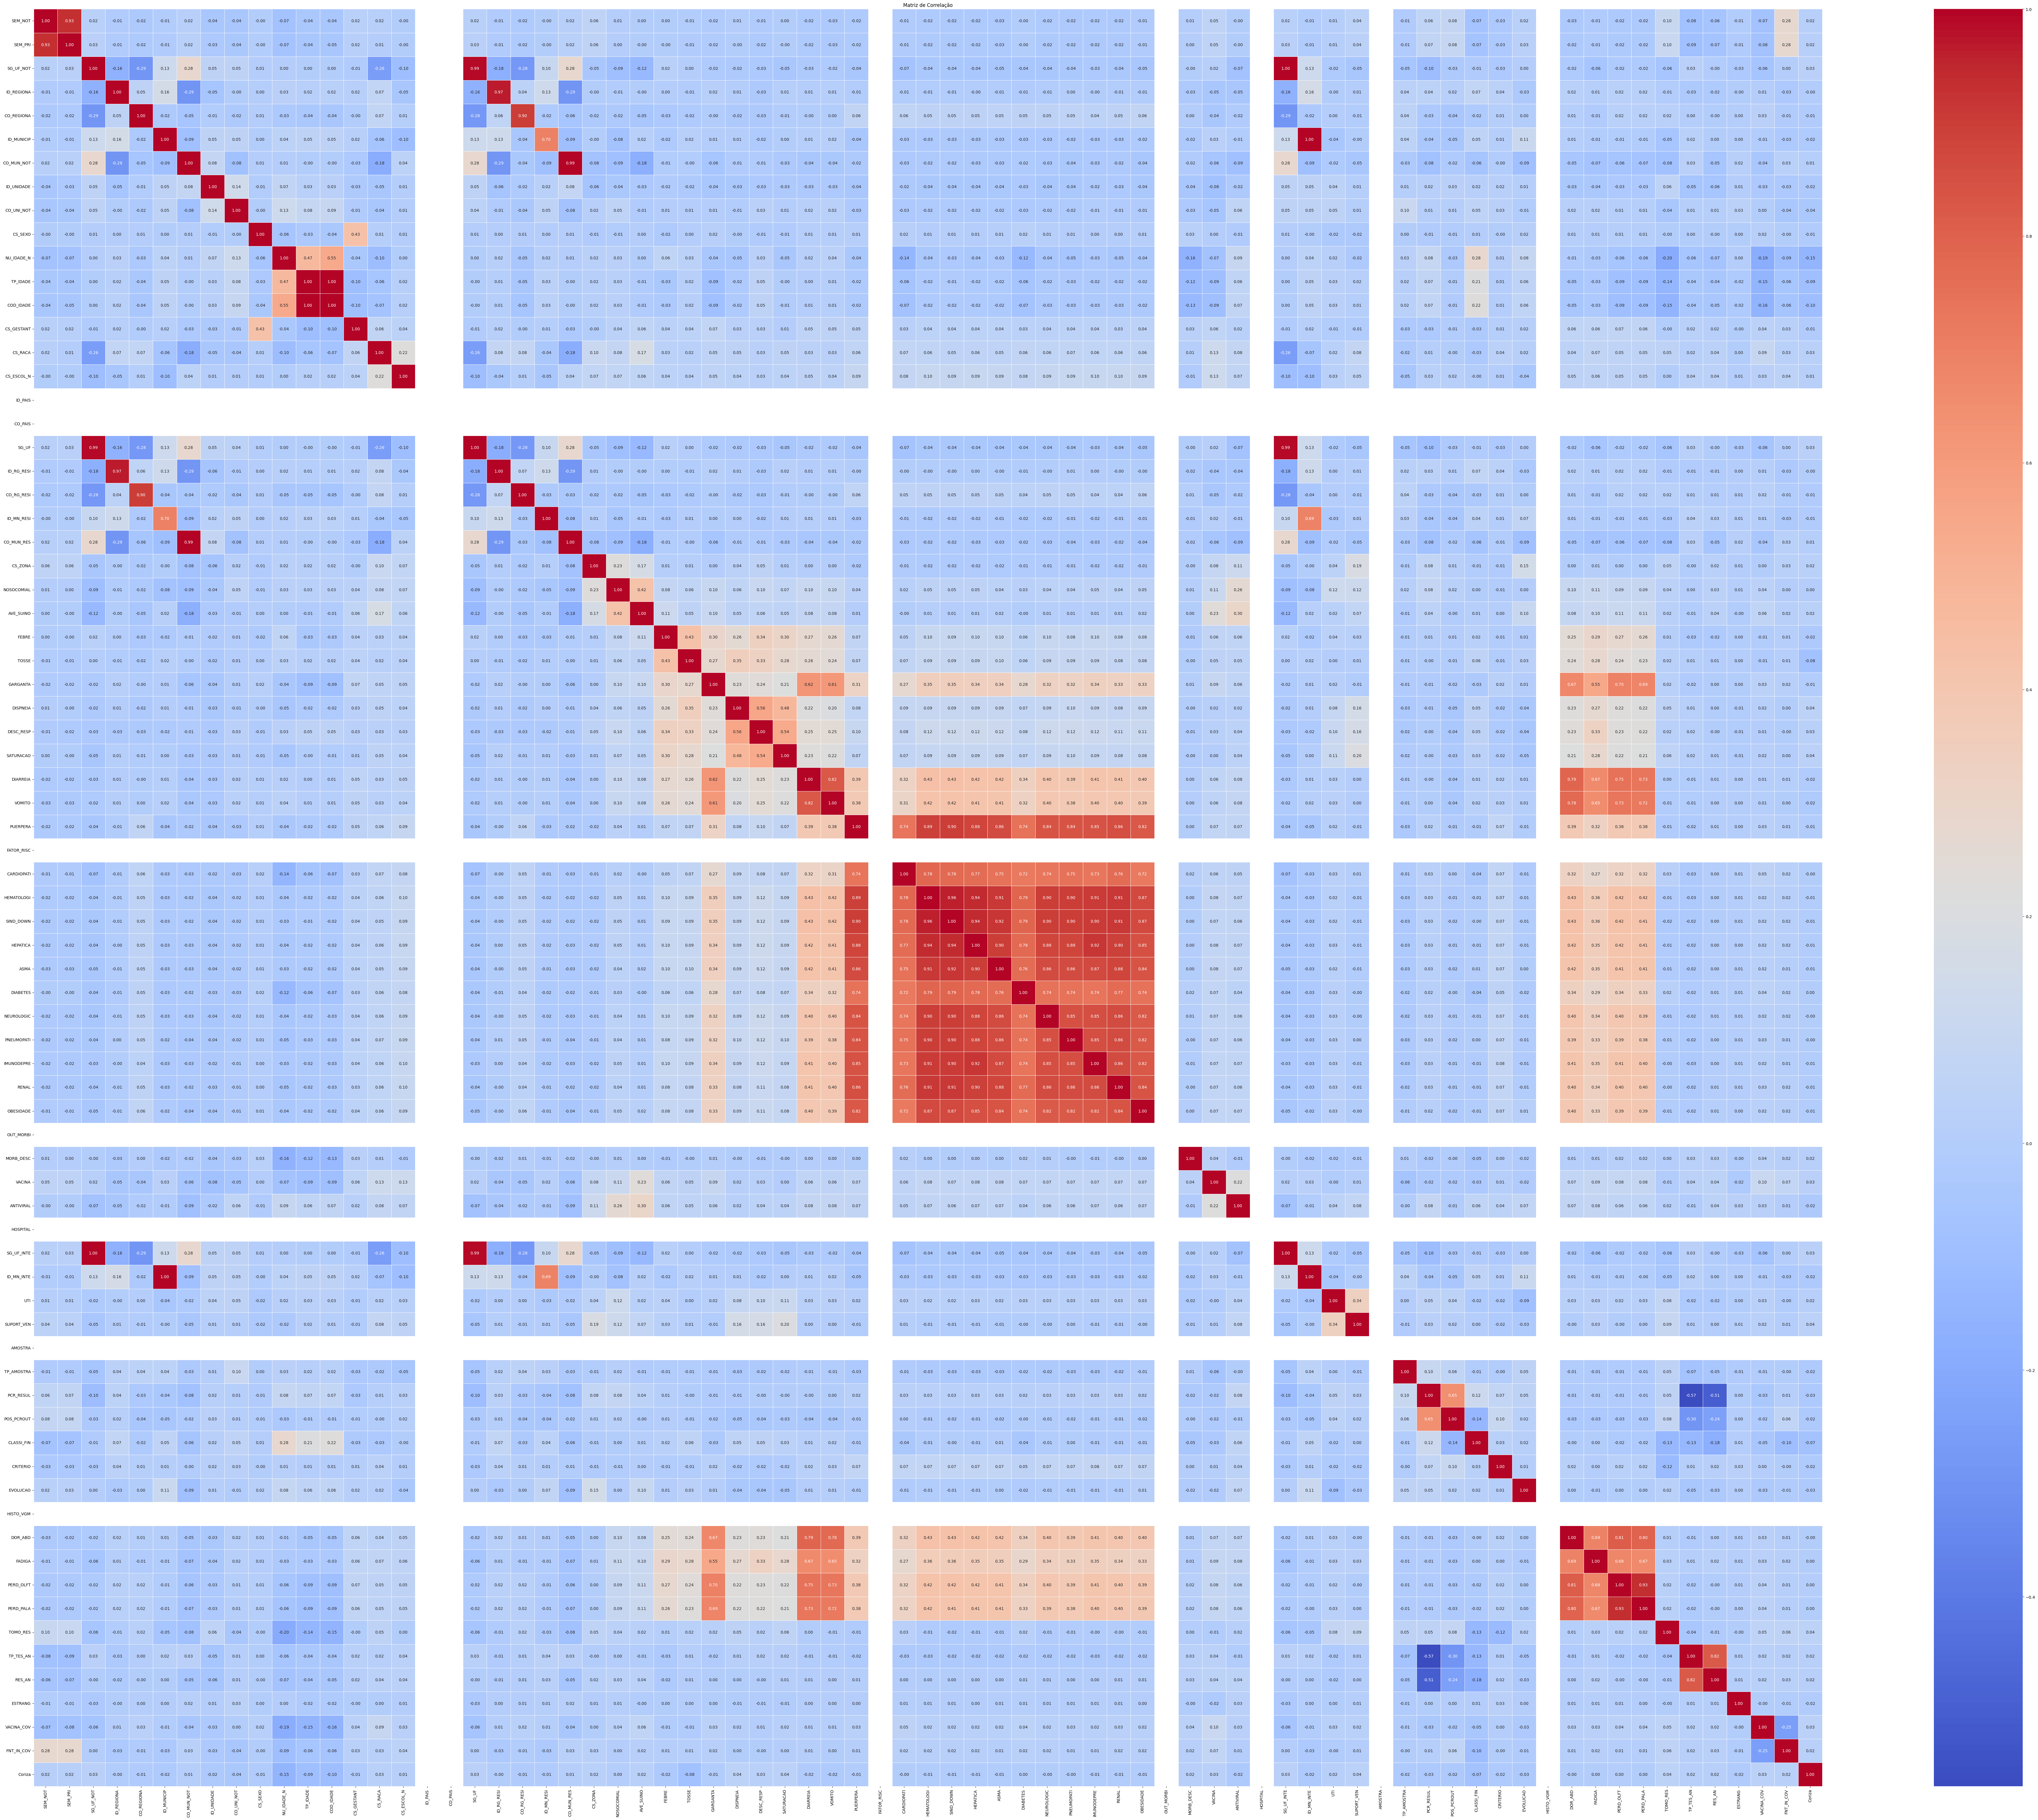

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o pandas para exibir todas as colunas
pd.set_option('display.max_columns', None)

# Supondo que seu DataFrame seja var_dfFinal
# Calcular a matriz de correlação
correlation_matrix = var_dfFinal.corr()

# Exibir a matriz de correlação
print(correlation_matrix)

# Definir o tamanho da figura para aumentar a resolução
plt.figure(figsize=(100, 80))  # Ajuste o tamanho conforme necessário

# Visualizar a matriz de correlação usando um mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()


In [38]:
var_dfFinal.corr()

,SEM_NOT,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ESCOL_N,ID_PAIS,CO_PAIS,SG_UF,ID_RG_RESI,CO_RG_RESI,ID_MN_RESI,CO_MUN_RES,CS_ZONA,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI,MORB_DESC,VACINA,ANTIVIRAL,HOSPITAL,SG_UF_INTE,ID_MN_INTE,UTI,SUPORT_VEN,AMOSTRA,TP_AMOSTRA,PCR_RESUL,POS_PCROUT,CLASSI_FIN,CRITERIO,EVOLUCAO,HISTO_VGM,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,TP_TES_AN,RES_AN,ESTRANG,VACINA_COV,FNT_IN_COV,Coriza
SEM_NOT,1.000000,0.927573,0.020549,-0.013448,-0.022408,-0.008301,0.015496,-0.042012,-0.044685,-0.002519,-0.071745,-0.039046,-0.044071,0.021771,0.015582,-0.002971,NaN,NaN,0.020735,-0.012950,-0.017082,-0.001594,0.015595,0.056120,0.006024,0.000695,0.000397,-0.008321,-0.015745,0.007762,-0.012411,0.002077,-0.018317,-0.027838,-0.020048,NaN,-0.010413,-0.019922,-0.022649,-0.022630,-0.025307,-0.000751,-0.020613,-0.023727,-0.021079,-0.022598,-0.010888,NaN,0.005749,0.054571,-0.003544,NaN,0.020627,-0.008136,0.010484,0.039689,NaN,-0.013692,0.062959,0.079197,-0.068178,-0.030771,0.024134,NaN,-0.025797,-0.014003,-0.024141,-0.022964,0.097180,-0.078279,-0.059544,-0.009903,-0.071702,0.275629,0.018632
SEM_PRI,0.927573,1.000000,0.030735,-0.011517,-0.022050,-0.011210,0.024405,-0.031221,-0.040476,-0.001612,-0.066101,-0.041698,-0.046044,0.018610,0.005421,-0.003020,NaN,NaN,0.030810,-0.012019,-0.017509,-0.002546,0.024883,0.056620,0.004887,-0.003868,-0.001373,-0.010356,-0.015082,-0.000425,-0.020775,-0.000542,-0.017216,-0.027634,-0.021678,NaN,-0.012405,-0.021603,-0.024204,-0.024942,-0.027076,-0.003142,-0.023109,-0.023964,-0.023801,-0.023124,-0.012258,NaN,0.002969,0.052453,-0.003787,NaN,0.030811,-0.010740,0.010183,0.038089,NaN,-0.013533,0.065819,0.084082,-0.069482,-0.034276,0.030368,NaN,-0.024798,-0.014143,-0.024020,-0.022730,0.101221,-0.085184,-0.065846,-0.010953,-0.075056,0.277569,0.015833
SG_UF_NOT,0.020549,0.030735,1.000000,-0.163309,-0.286722,0.129829,0.280996,0.046510,0.045834,0.006545,0.002403,0.000266,0.000486,-0.011049,-0.257094,-0.097701,NaN,NaN,0.992746,-0.178380,-0.282009,0.095890,0.278578,-0.045302,-0.094424,-0.122370,0.021920,0.002931,-0.018251,-0.023190,-0.033414,-0.047663,-0.025304,-0.021681,-0.043127,NaN,-0.067727,-0.039912,-0.040593,-0.040933,-0.045154,-0.041582,-0.041435,-0.040351,-0.034334,-0.036332,-0.047655,NaN,-0.001089,0.020480,-0.074089,NaN,0.999915,0.129036,-0.017880,-0.049202,NaN,-0.054528,-0.102639,-0.025471,-0.010495,-0.030628,0.004147,NaN,-0.021873,-0.057624,-0.020609,-0.021954,-0.058398,0.026729,-0.004239,-0.032881,-0.061536,0.004477,0.027113
ID_REGIONA,-0.013448,-0.011517,-0.163309,1.000000,0.048594,0.160965,-0.294957,-0.054782,-0.003906,0.003463,0.032367,0.018478,0.020702,0.016085,0.070513,-0.047706,NaN,NaN,-0.163652,0.969099,0.043201,0.131890,-0.293843,-0.001079,-0.005782,-0.003413,0.003849,-0.009372,0.016660,0.005439,-0.025325,0.013503,0.008237,0.011284,-0.007687,NaN,-0.006107,-0.005742,-0.009173,-0.004391,-0.006117,-0.011474,-0.005174,0.003565,-0.001410,-0.008280,-0.008389,NaN,-0.025757,-0.045779,-0.048539,NaN,-0.163416,0.162584,-0.000327,0.005402,NaN,0.037347,0.042639,0.016079,0.071035,0.037248,-0.025045,NaN,0.020559,0.014213,0.021812,0.021296,-0.009544,-0.025574,-0.019147,-0.000104,0.006353,-0.033982,-0.004592
CO_REGIONA,-0.022408,-0.022050,-0.286722,0.048594,1.000000,-0.024079,-0.054543,-0.008482,-0.023327,0.007121,-0.032426,-0.040063,-0.041228,-0.004980,0.074039,0.011997,NaN,NaN,-0.284436,0.062035,0.898441,-0.022246,-0.055702,-0.022759,-0.022374,-0.049289,-0.033678,-0.020940,-0.004561,-0.023205,-0.027420,-0.007190,-0.001830,0.001565,0.064606,NaN,0.058959,0.048464,0.049603,0.049312,0.052746,0.047048,0.049729,0.051177,0.041919,0.047203,0.064692,NaN,0.004767,-0.044409,-0.015337,NaN,-0.286695,-0.024880,0.002758,-0.006741,NaN,0.

# Modeling
Iniciando a modelagem do problema e separando em treino e teste

### Teste para as melhores colunas

In [39]:
var_dfFinal.head(5)

,SEM_NOT,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ESCOL_N,ID_PAIS,CO_PAIS,SG_UF,ID_RG_RESI,CO_RG_RESI,ID_MN_RESI,CO_MUN_RES,CS_ZONA,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI,MORB_DESC,VACINA,ANTIVIRAL,HOSPITAL,SG_UF_INTE,ID_MN_INTE,UTI,SUPORT_VEN,AMOSTRA,TP_AMOSTRA,PCR_RESUL,POS_PCROUT,CLASSI_FIN,CRITERIO,EVOLUCAO,HISTO_VGM,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,TP_TES_AN,RES_AN,ESTRANG,VACINA_COV,FNT_IN_COV,Coriza
21,3,2,21,145,1348,838,354340,1387,5171946,0,94,3,3094,5,1,1,0,1,21,163,1348,2655,354340,1,2,2,1,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,1,2,2,2,2,1,680,9,2,1,21,833,2,2,1,1,1,1,5,1,2,0,2,2,2,2,9,9,5,2,9,1,0
29,3,2,16,159,1412,3,240020,1243,2410486,2,79,3,3079,6,4,9,0,1,16,177,1412,21,240020,1,2,2,1,1,2,1,1,1,2,2,2,1,2,2,2,2,2,1,2,2,2,2,2,1,6599,9,1,1,16,2,1,2,1,1,5,9,4,1,1,0,2,2,2,2,9,2,2,2,1,1,0
40,3,3,12,156,1377,525,250750,622,2400324,2,40,3,3040,6,4,9,0,1,12,174,1377,1678,250750,1,2,2,2,2,1,1,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,1,24103,2,2,1,12,518,2,3,1,1,2,9,4,1,3,0,2,2,2,2,9,9,9,2,1,1,0
41,3,3,0,225,1938,841,120040,688,2001578,2,51,3,3051,6,4,9,0,1,0,256,1938,19,120001,2,2,9,1,2,2,1,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,1,14388,9,2,1,0,835,2,1,1,4,2,9,5,4,2,0,2,1,2,2,1,9,5,9,1,1,0
56,2,2,21,152,1353,1008,355220,76,2055449,2,52,3,3052,6,1,1,0,1,21,170,1353,3205,355220,1,2,2,2,2,2,2,2,2,2,2,9,1,9,9,9,9,9,9,9,9,9,9,9,1,10180,9,2,1,21,1001,2,3,1,1,4,9,5,1,1,0,2,2,2,2,9,2,1,2,1,1,0


In [40]:
# Teste para encontrar as melhores colunas
var_dfColunasParaPrevisao = var_dfFinal[['CS_SEXO', 'NU_IDADE_N','CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'NOSOCOMIAL',
                                  'AVE_SUINO','FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA',
                                  'VOMITO','PUERPERA','FATOR_RISC','CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA', 'DIABETES',
                                  'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'VACINA','Coriza', 'CLASSI_FIN']]
var_dfColunasParaPrevisao.head()

,CS_SEXO,NU_IDADE_N,CS_GESTANT,CS_RACA,CS_ESCOL_N,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,VACINA,Coriza,CLASSI_FIN
21,0,94,5,1,1,2,2,1,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,1,2,2,2,2,9,0,5
29,2,79,6,4,9,2,2,1,1,2,1,1,1,2,2,2,1,2,2,2,2,2,1,2,2,2,2,2,9,0,4
40,2,40,6,4,9,2,2,2,2,1,1,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,0,4
41,2,51,6,4,9,2,9,1,2,2,1,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,9,0,5
56,2,52,6,1,1,2,2,2,2,2,2,2,2,2,2,9,1,9,9,9,9,9,9,9,9,9,9,9,9,0,5


In [41]:
# Lista de colunas a serem usadas como features (X) para previsão.
var_listColunasXTesteMelhoria = [var_coluna for var_coluna in var_dfColunasParaPrevisao.columns if var_coluna != 'CLASSI_FIN']

# Seleciona as colunas de features (X) e a coluna alvo (y) para previsão.
var_x = var_dfColunasParaPrevisao[var_listColunasXTesteMelhoria]  # Features (X).
var_y = var_dfColunasParaPrevisao[['CLASSI_FIN']]  # Alvo (y).


### Todas as colunas

In [42]:
# Lista de colunas a serem usadas como features (X) para previsão, excluindo a coluna 'CLASSI_FIN'.
var_colunasX = [var_coluna for var_coluna in var_dfFinal.columns if var_coluna != 'CLASSI_FIN']

# Seleciona as colunas de features (X) e a coluna alvo (y) para previsão.
var_x = var_dfFinal[var_colunasX]  # Features (X).
var_y = var_dfFinal[['CLASSI_FIN']]  # Alvo (y).


Porcentagem de dados por cada tipo de classificação

In [43]:
var_dfFinal['CLASSI_FIN'].value_counts()/len(var_dfFinal)*100

CLASSI_FIN
5    52.101127
4    41.275402
2     3.374514
1     2.373165
3     0.875792
Name: count, dtype: Float64

In [44]:
# Divisão dos dados em conjuntos de treinamento e teste, mantendo a proporção das classes da variável alvo (stratify).
var_xTrain, var_xTest, var_yTrain, var_yTest = train_test_split(var_x, var_y, test_size=0.25, stratify=var_y, random_state=42)


In [45]:
print(var_xTrain.shape)
print(var_xTest.shape)
print(var_yTrain.shape)
print(var_yTest.shape)

(48384, 74)
(16129, 74)
(48384, 1)
(16129, 1)


## LogisticRegression

In [46]:
# Criação de um modelo de Regressão Logística.
var_lr = LogisticRegression()

# Treinamento do modelo de Regressão Logística com os dados de treinamento.
var_lr.fit(var_xTrain, var_yTrain)


c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
# Predição dos valores do conjunto de teste e do conjunto de treinamento usando o modelo de Regressão Logística.
var_yPredLrTest = var_lr.predict(var_xTest)  # Predição para o conjunto de teste.
var_yPredLrTrain = var_lr.predict(var_xTrain)  # Predição para o conjunto de treinamento.

# Métricas de Avaliação

# Acurácia
print(f'Acurácia Teste: {accuracy_score(var_yTest, var_yPredLrTest)*100}%')
print(f'Acurácia Treino: {accuracy_score(var_yTrain, var_yPredLrTrain)*100}%')
print('============================================================= \n')

# F1-score
print(f'f1_score Test: {f1_score(var_yTest, var_yPredLrTest, average="weighted")*100}%')
print(f'f1_score Treino: {f1_score(var_yTrain, var_yPredLrTrain, average="weighted")*100}%')
print('============================================================= \n')

# Precisão
print(f'Precisão Teste: {precision_score(var_yTest, var_yPredLrTest, average="weighted")*100}%')
print(f'Precisão Treino: {precision_score(var_yTrain, var_yPredLrTrain, average="weighted")*100}%')
print('============================================================= \n')

# Recall
print(f'Recall Teste: {recall_score(var_yTest, var_yPredLrTest, average="weighted")*100}%')
print(f'Recall Treino: {recall_score(var_yTrain, var_yPredLrTrain, average="weighted")*100}%')
print('============================================================= \n')

# Área sob a curva ROC
print(f'ROC Teste: {roc_auc_score(var_yTest, var_lr.predict_proba(var_xTest), multi_class="ovr")*100}%')
print(f'ROC Treino: {roc_auc_score(var_yTrain, var_lr.predict_proba(var_xTrain), multi_class="ovr")*100}%')



c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Acurácia Teste: 52.13590427180854%
Acurácia Treino: 52.114335317460316%

f1_score Test: 39.17402498869219%
f1_score Treino: 38.95996340235764%

Precisão Teste: 45.99597343760484%
Precisão Treino: 45.812643816716765%

Recall Teste: 52.13590427180854%
Recall Treino: 52.114335317460316%

ROC Teste: 50.075433227724965%
ROC Treino: 50.05045590981534%


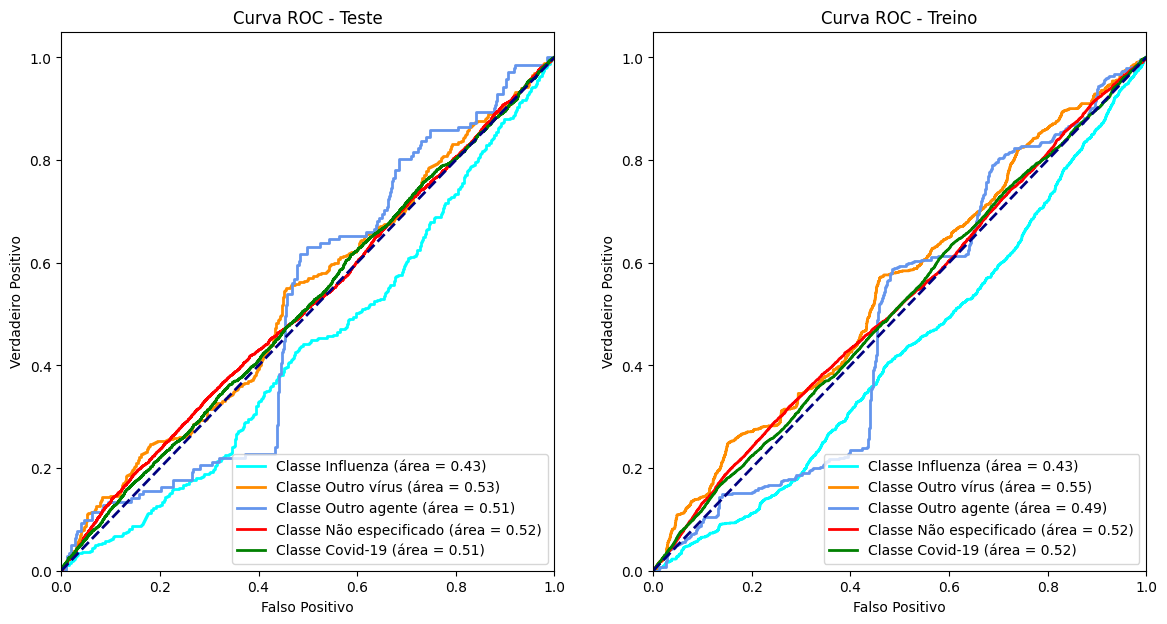

In [48]:
# Binarizando os rótulos
var_yTest_binarized = label_binarize(var_yTest, classes=var_lr.classes_)
var_yTrain_binarized = label_binarize(var_yTrain, classes=var_lr.classes_)
n_classes = var_yTest_binarized.shape[1]

# Plotando a Curva ROC para o conjunto de teste e treino
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()

fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()

for i in range(n_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(var_yTest_binarized[:, i], var_lr.predict_proba(var_xTest)[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])
    fpr_train[i], tpr_train[i], _ = roc_curve(var_yTrain_binarized[:, i], var_lr.predict_proba(var_xTrain)[:, i])
    roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Nomes das classes
class_names = ['Influenza​', 'Outro vírus', 'Outro agente', 'Não especificado​', 'Covid-19​']

# Plotando todas as curvas ROC
plt.figure(figsize=(14, 7))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])

# Curva ROC para o conjunto de teste
plt.subplot(1, 2, 1)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_test[i], tpr_test[i], color=color, lw=2, label=f'Classe {class_names[i]} (área = {roc_auc_test[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Teste')
plt.legend(loc="lower right")

# Curva ROC para o conjunto de treino
plt.subplot(1, 2, 2)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_train[i], tpr_train[i], color=color, lw=2, label=f'Classe {class_names[i]} (área = {roc_auc_train[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Treino')
plt.legend(loc="lower right")

plt.show()

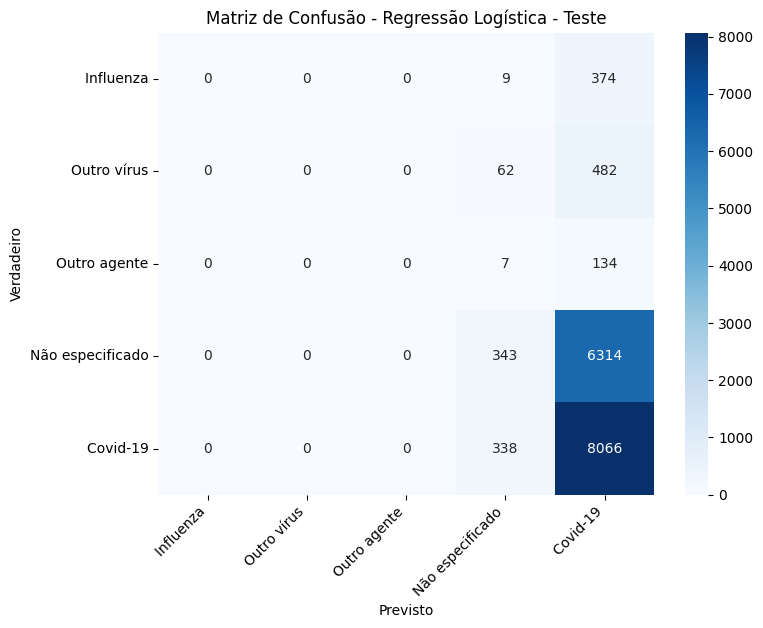

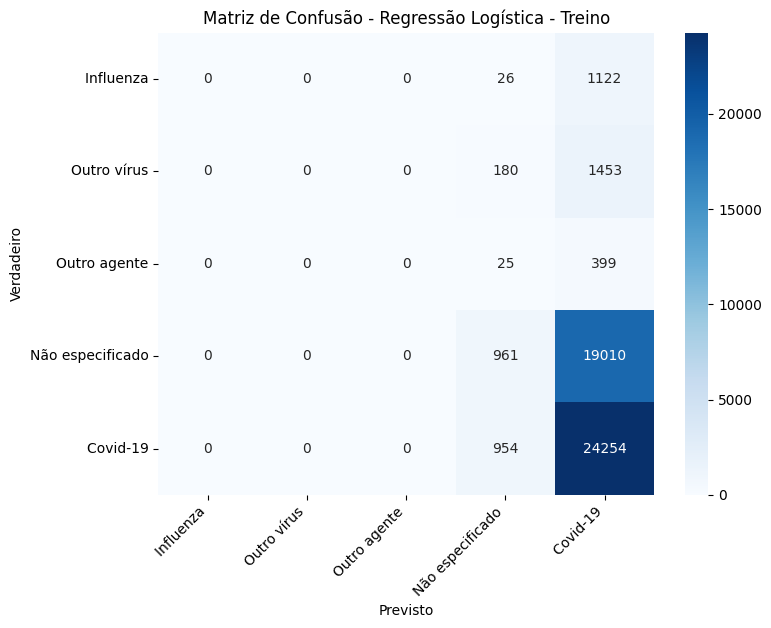

In [49]:

# Nomes das classes
class_names = ['Influenza​', 'Outro vírus', 'Outro agente', 'Não especificado​', 'Covid-19​']


# Predições nos conjuntos de teste e treino usando o modelo de Regressão Logística.
var_yPredLrTest = var_lr.predict(var_xTest)
var_yPredLrTrain = var_lr.predict(var_xTrain)

# Matriz de Confusão para o conjunto de teste
conf_matrix_lr_test = confusion_matrix(var_yTest, var_yPredLrTest)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsto')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Regressão Logística - Teste')
plt.show()

# Matriz de Confusão para o conjunto de treino
conf_matrix_lr_train = confusion_matrix(var_yTrain, var_yPredLrTrain)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr_train, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsto')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Regressão Logística - Treino')
plt.show()


## KNN

In [50]:
# Criação de um modelo K-Vizinhos Mais Próximos com 5 vizinhos.
var_knn = KNeighborsClassifier(n_neighbors=7)

# Treinamento do modelo K-Vizinhos Mais Próximos com os dados de treinamento.
var_knn.fit(var_xTrain, var_yTrain)


c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [51]:
# Predição dos valores do conjunto de teste e do conjunto de treinamento usando o modelo K-Vizinhos Mais Próximos.
var_yPredKnnTest = var_knn.predict(var_xTest)  # Predição para o conjunto de teste.
var_yPredKnnTrain = var_knn.predict(var_xTrain)  # Predição para o conjunto de treinamento.

# Métricas de Avaliação

# Acurácia
print(f'Acurácia Teste: {accuracy_score(var_yTest, var_yPredKnnTest)*100}%')
print(f'Acurácia Treino: {accuracy_score(var_yTrain, var_yPredKnnTrain)*100}%')
print('============================================================= \n')

# F1-score
print(f'f1_score Test: {f1_score(var_yTest, var_yPredKnnTest, average="weighted")*100}%')
print(f'f1_score Treino: {f1_score(var_yTrain, var_yPredKnnTrain, average="weighted")*100}%')
print('============================================================= \n')

# Precisão
print(f'Precisão Teste: {precision_score(var_yTest, var_yPredKnnTest, average="weighted")*100}%')
print(f'Precisão Treino: {precision_score(var_yTrain, var_yPredKnnTrain, average="weighted")*100}%')
print('============================================================= \n')

# Recall
print(f'Recall Teste: {recall_score(var_yTest, var_yPredKnnTest, average="weighted")*100}%')
print(f'Recall Treino: {recall_score(var_yTrain, var_yPredKnnTrain, average="weighted")*100}%')
print('============================================================= \n')

# Área sob a curva ROC
print(f'ROC Teste: {roc_auc_score(var_yTest, var_knn.predict_proba(var_xTest), multi_class="ovr")*100}%')
print(f'ROC Treino: {roc_auc_score(var_yTrain, var_knn.predict_proba(var_xTrain), multi_class="ovr")*100}%')


Acurácia Teste: 62.415524831049666%
Acurácia Treino: 70.97387566137566%

f1_score Test: 61.26870588326139%
f1_score Treino: 69.96203773842305%

Precisão Teste: 60.63526721757025%
Precisão Treino: 69.95756047499543%

Recall Teste: 62.415524831049666%
Recall Treino: 70.97387566137566%

ROC Teste: 69.47194373975013%
ROC Treino: 91.19276499353542%


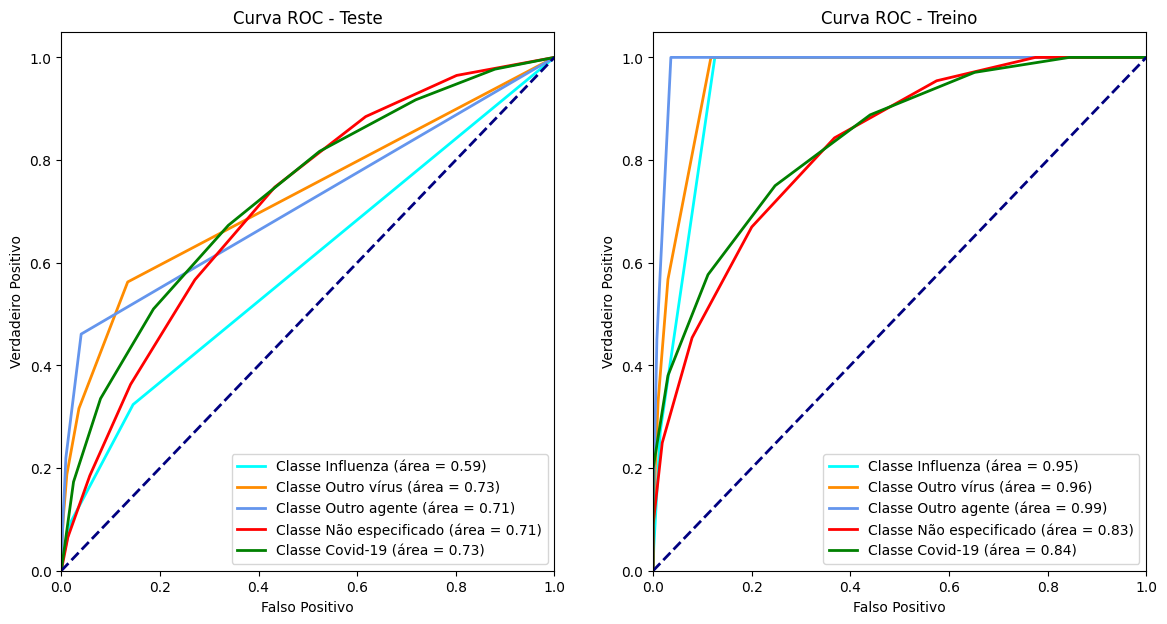

In [52]:
# Binarizando os rótulos
var_yTest_binarized = label_binarize(var_yTest, classes=var_knn.classes_)
var_yTrain_binarized = label_binarize(var_yTrain, classes=var_knn.classes_)
n_classes = var_yTest_binarized.shape[1]

# Plotando a Curva ROC para o conjunto de teste e treino
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()

fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()

for i in range(n_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(var_yTest_binarized[:, i], var_knn.predict_proba(var_xTest)[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])
    fpr_train[i], tpr_train[i], _ = roc_curve(var_yTrain_binarized[:, i], var_knn.predict_proba(var_xTrain)[:, i])
    roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Nomes das classes
class_names = ['Influenza​', 'Outro vírus', 'Outro agente', 'Não especificado​', 'Covid-19​']

# Plotando todas as curvas ROC
plt.figure(figsize=(14, 7))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])


# Curva ROC para o conjunto de teste
plt.subplot(1, 2, 1)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_test[i], tpr_test[i], color=color, lw=2, label=f'Classe {class_names[i]} (área = {roc_auc_test[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Teste')
plt.legend(loc="lower right")

# Curva ROC para o conjunto de treino
plt.subplot(1, 2, 2)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_train[i], tpr_train[i], color=color, lw=2, label=f'Classe {class_names[i]} (área = {roc_auc_train[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Treino')
plt.legend(loc="lower right")

plt.show()

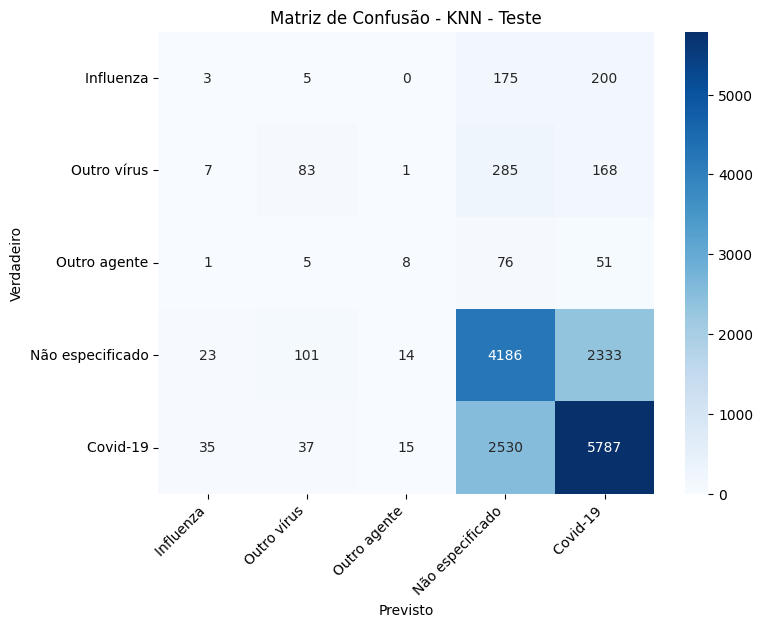

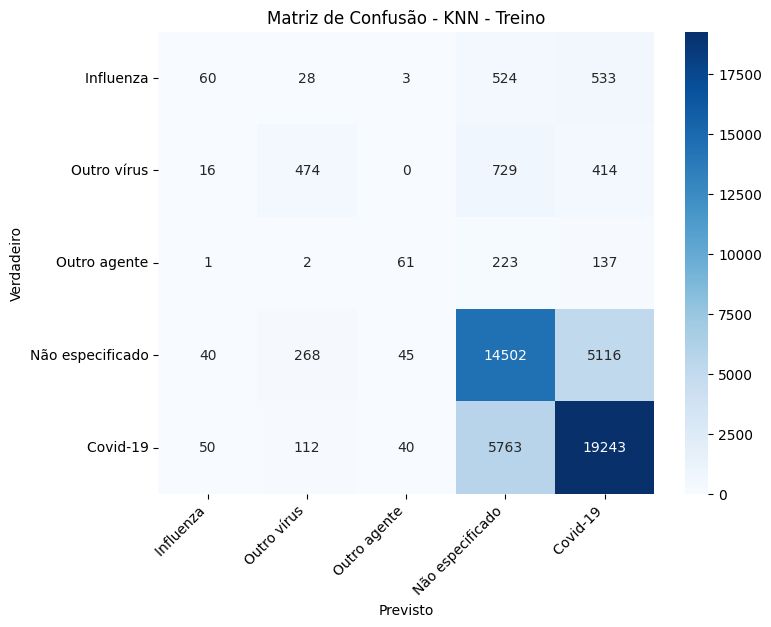

In [53]:
# Nomes das classes
class_names = ['Influenza​', 'Outro vírus', 'Outro agente', 'Não especificado​', 'Covid-19​']


# Predições nos conjuntos de teste e treino usando o modelo K-Vizinhos Mais Próximos.
var_yPredKnnTest = var_knn.predict(var_xTest)
var_yPredKnnTrain = var_knn.predict(var_xTrain)

# Matriz de Confusão para o conjunto de teste
conf_matrix_knn_test = confusion_matrix(var_yTest, var_yPredKnnTest)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsto')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - KNN - Teste')
plt.show()

# Matriz de Confusão para o conjunto de treino
conf_matrix_knn_train = confusion_matrix(var_yTrain, var_yPredKnnTrain)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn_train, annot=True, fmt='d', cmap='Blues',  xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsto')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - KNN - Treino')
plt.show()


##  Naive Bayes

In [54]:
# Criação do classificador Naive Bayes Gaussiano.
var_nb = GaussianNB()

# Treinamento do modelo Naive Bayes Gaussiano com os dados de treinamento.
var_nb.fit(var_xTrain, var_yTrain)


c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [55]:
# Predições nos conjuntos de teste e treino usando o modelo Naive Bayes
var_yPredNbTest = var_nb.predict(var_xTest)  # Predição para o conjunto de teste.
var_yPredNbTrain = var_nb.predict(var_xTrain)  # Predição para o conjunto de treinamento.

# Métricas de Avaliação

# Acurácia
print(f'Acurácia Teste: {accuracy_score(var_yTest, var_yPredNbTest)*100}%')
print(f'Acurácia Treino: {accuracy_score(var_yTrain, var_yPredNbTrain)*100}%')
print('============================================================= \n')

# F1-score
print(f'f1_score Test: {f1_score(var_yTest, var_yPredNbTest, average="weighted")*100}%')
print(f'f1_score Treino: {f1_score(var_yTrain, var_yPredNbTrain, average="weighted")*100}%')
print('============================================================= \n')

# Precisão
print(f'Precisão Teste: {precision_score(var_yTest, var_yPredNbTest, average="weighted")*100}%')
print(f'Precisão Treino: {precision_score(var_yTrain, var_yPredNbTrain, average="weighted")*100}%')
print('============================================================= \n')

# Recall
print(f'Recall Teste: {recall_score(var_yTest, var_yPredNbTest, average="weighted")*100}%')
print(f'Recall Treino: {recall_score(var_yTrain, var_yPredNbTrain, average="weighted")*100}%')
print('============================================================= \n')

# Área sob a curva ROC
print(f'ROC Teste: {roc_auc_score(var_yTest, var_nb.predict_proba(var_xTest), multi_class="ovr")*100}%')
print(f'ROC Treino: {roc_auc_score(var_yTrain, var_nb.predict_proba(var_xTrain), multi_class="ovr")*100}%')


Acurácia Teste: 53.084506169012336%
Acurácia Treino: 53.26760912698413%

f1_score Test: 40.938597201086466%
f1_score Treino: 41.25857301236914%

Precisão Teste: 52.20023265975661%
Precisão Treino: 52.666817223880315%

Recall Teste: 53.084506169012336%
Recall Treino: 53.26760912698413%

ROC Teste: 63.84046410892454%


c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ROC Treino: 64.7659229994828%


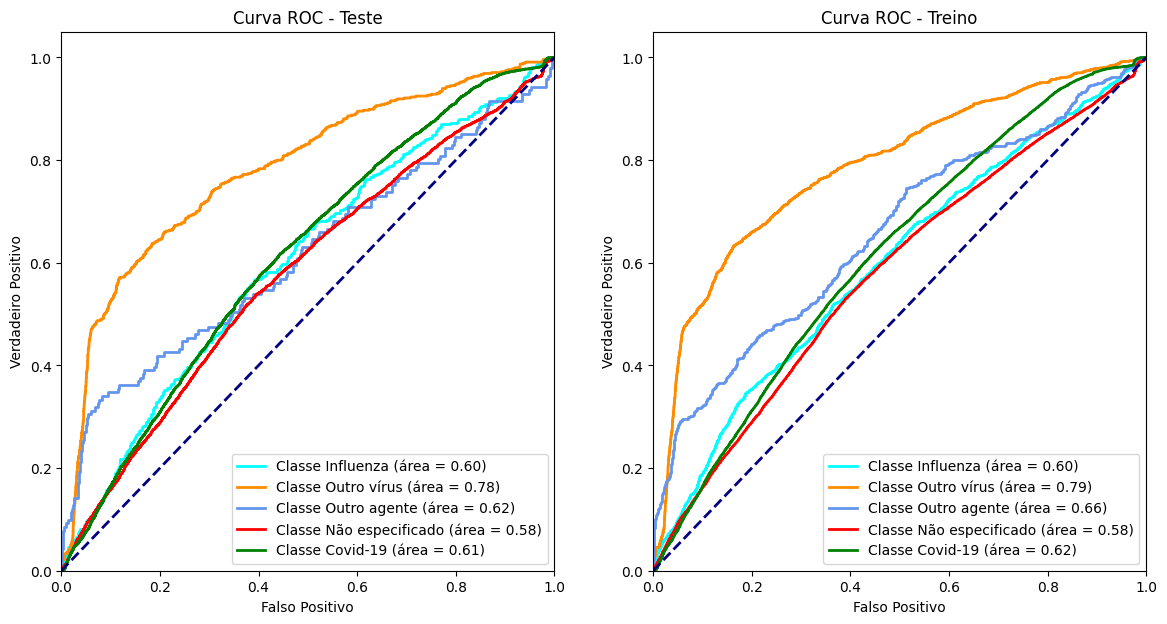

In [56]:
# Binarizando os rótulos
var_yTest_binarized = label_binarize(var_yTest, classes=var_nb.classes_)
var_yTrain_binarized = label_binarize(var_yTrain, classes=var_nb.classes_)
n_classes = var_yTest_binarized.shape[1]

# Plotando a Curva ROC para o conjunto de teste e treino
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()

fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()

for i in range(n_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(var_yTest_binarized[:, i], var_nb.predict_proba(var_xTest)[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])
    fpr_train[i], tpr_train[i], _ = roc_curve(var_yTrain_binarized[:, i], var_nb.predict_proba(var_xTrain)[:, i])
    roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Nomes das classes
class_names = ['Influenza​', 'Outro vírus', 'Outro agente', 'Não especificado​', 'Covid-19​']

# Plotando todas as curvas ROC
plt.figure(figsize=(14, 7))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])


# Curva ROC para o conjunto de teste
plt.subplot(1, 2, 1)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_test[i], tpr_test[i], color=color, lw=2, label=f'Classe {class_names[i]} (área = {roc_auc_test[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Teste')
plt.legend(loc="lower right")

# Curva ROC para o conjunto de treino
plt.subplot(1, 2, 2)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_train[i], tpr_train[i], color=color, lw=2, label=f'Classe {class_names[i]} (área = {roc_auc_train[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Treino')
plt.legend(loc="lower right")

plt.show()

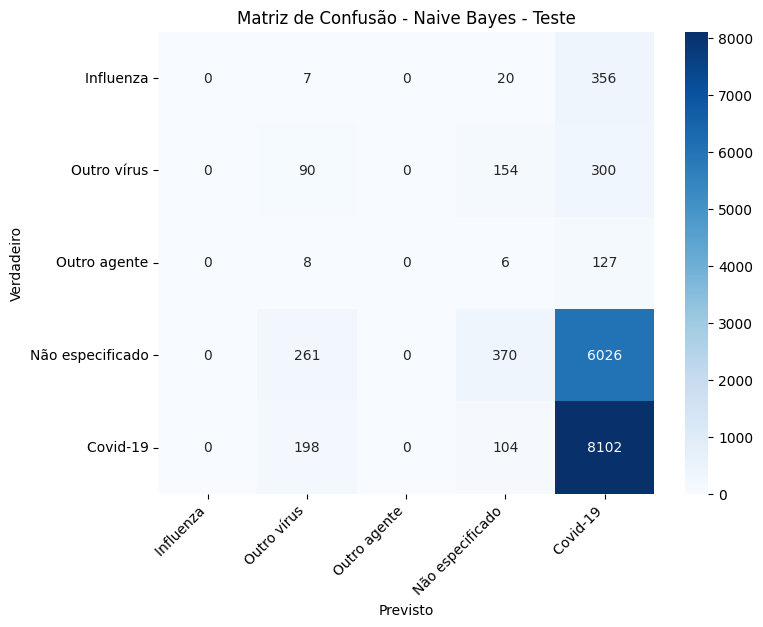

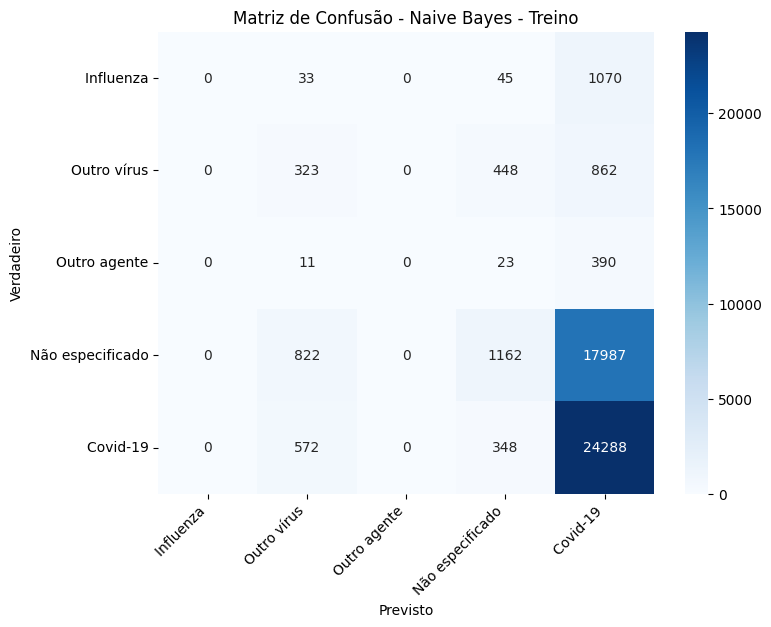

In [ ]:
# Nomes das classes
class_names = ['Influenza​', 'Outro vírus', 'Outro agente', 'Não especificado​', 'Covid-19​']

# Predições nos conjuntos de teste e treino usando o modelo Naive Bayes.
var_yPredNbTest = var_nb.predict(var_xTest)
var_yPredNbTrain = var_nb.predict(var_xTrain)

# Matriz de Confusão para o conjunto de teste
conf_matrix_nb_test = confusion_matrix(var_yTest, var_yPredNbTest)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsto')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Naive Bayes - Teste')
plt.show()

# Matriz de Confusão para o conjunto de treino
conf_matrix_nb_train = confusion_matrix(var_yTrain, var_yPredNbTrain)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb_train, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsto')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Naive Bayes - Treino')
plt.show()


# Metas TCC2

Aplicar novos modelos: SVM, Gradient Boosting, Árvores de Decisão e Florestas Aleatórias;​

Utilizar o Grid Search;​

Melhorar o pré-processamento dos dados da SRAG;

## SVM

In [53]:
# Criação do classificador SVM.
var_svc = SVC(C=1, random_state=1, kernel='linear')

# Treinamento do modelo SVM com os dados de treinamento.
var_svc.fit(var_xTrain, var_yTrain)


c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Predições nos conjuntos de teste e treino usando o modelo SVM
var_yPredSVCTest = var_svc.predict(var_xTest)  # Predição para o conjunto de teste.
var_yPredSVCTrain = var_svc.predict(var_xTrain)  # Predição para o conjunto de treinamento.

# Métricas de Avaliação

# Acurácia
print(f'Acurácia Teste: {accuracy_score(var_yTest, var_yPredSVCTest)*100}%')
print(f'Acurácia Treino: {accuracy_score(var_yTrain, var_yPredSVCTrain)*100}%')
print('============================================================= \n')

# F1-score
print(f'f1_score Test: {f1_score(var_yTest, var_yPredSVCTest, average="weighted")*100}%')
print(f'f1_score Treino: {f1_score(var_yTrain, var_yPredSVCTrain, average="weighted")*100}%')
print('============================================================= \n')

# Precisão
print(f'Precisão Teste: {precision_score(var_yTest, var_yPredSVCTest, average="weighted")*100}%')
print(f'Precisão Treino: {precision_score(var_yTrain, var_yPredSVCTrain, average="weighted")*100}%')
print('============================================================= \n')

# Recall
print(f'Recall Teste: {recall_score(var_yTest, var_yPredSVCTest, average="weighted")*100}%')
print(f'Recall Treino: {recall_score(var_yTrain, var_yPredSVCTrain, average="weighted")*100}%')
print('============================================================= \n')

# Área sob a curva ROC
print(f'ROC Teste: {roc_auc_score(var_yTest, var_svc.predict_proba(var_xTest), multi_class="ovr")*100}%')
print(f'ROC Treino: {roc_auc_score(var_yTrain, var_svc.predict_proba(var_xTrain), multi_class="ovr")*100}%')


## Gradient Boosting

In [57]:
# Criação do classificador Gradient Boosting.
var_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=2024)

# Treinamento do modelo Gradient Boosting com os dados de treinamento.
var_gb.fit(var_xTrain, var_yTrain)

c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=2024)

In [58]:
# Predições nos conjuntos de teste e treino usando o modelo SVM
var_yPredGBTest = var_gb.predict(var_xTest)  # Predição para o conjunto de teste.
var_yPredGBTrain = var_gb.predict(var_xTrain)  # Predição para o conjunto de treinamento.

# Métricas de Avaliação

# Acurácia
print(f'Acurácia Teste: {accuracy_score(var_yTest, var_yPredGBTest)*100}%')
print(f'Acurácia Treino: {accuracy_score(var_yTrain, var_yPredGBTrain)*100}%')
print('============================================================= \n')

# F1-score
print(f'f1_score Test: {f1_score(var_yTest, var_yPredGBTest, average="weighted")*100}%')
print(f'f1_score Treino: {f1_score(var_yTrain, var_yPredGBTrain, average="weighted")*100}%')
print('============================================================= \n')

# Precisão
print(f'Precisão Teste: {precision_score(var_yTest, var_yPredGBTest, average="weighted")*100}%')
print(f'Precisão Treino: {precision_score(var_yTrain, var_yPredGBTrain, average="weighted")*100}%')
print('============================================================= \n')

# Recall
print(f'Recall Teste: {recall_score(var_yTest, var_yPredGBTest, average="weighted")*100}%')
print(f'Recall Treino: {recall_score(var_yTrain, var_yPredGBTrain, average="weighted")*100}%')
print('============================================================= \n')

# Área sob a curva ROC
print(f'ROC Teste: {roc_auc_score(var_yTest, var_gb.predict_proba(var_xTest), multi_class="ovr")*100}%')
print(f'ROC Treino: {roc_auc_score(var_yTrain, var_gb.predict_proba(var_xTrain), multi_class="ovr")*100}%')


Acurácia Teste: 95.75919151838303%
Acurácia Treino: 96.20742394179894%

f1_score Test: 95.40031677317383%
f1_score Treino: 95.87668832658886%

Precisão Teste: 95.30694044137901%
Precisão Treino: 95.94831615815515%

Recall Teste: 95.75919151838303%
Recall Treino: 96.20742394179894%

ROC Teste: 97.11952023898792%
ROC Treino: 98.68725413586634%


## Árvores de Decisão

In [61]:
# Criação do classificador Árvore de decisão.
var_tree = DecisionTreeClassifier( max_depth=3, random_state=2024)

# Treinamento do modelo Árvore de decisão com os dados de treinamento.
var_tree.fit(var_xTrain, var_yTrain)

DecisionTreeClassifier(max_depth=3, random_state=2024)

In [63]:
# Predições nos conjuntos de teste e treino usando o modelo SVM
var_yPredTreeTest = var_tree.predict(var_xTest)  # Predição para o conjunto de teste.
var_yPredTreeTrain = var_tree.predict(var_xTrain)  # Predição para o conjunto de treinamento.

# Métricas de Avaliação

# Acurácia
print(f'Acurácia Teste: {accuracy_score(var_yTest, var_yPredTreeTest)*100}%')
print(f'Acurácia Treino: {accuracy_score(var_yTrain, var_yPredTreeTrain)*100}%')
print('============================================================= \n')

# F1-score
print(f'f1_score Test: {f1_score(var_yTest, var_yPredTreeTest, average="weighted")*100}%')
print(f'f1_score Treino: {f1_score(var_yTrain, var_yPredTreeTrain, average="weighted")*100}%')
print('============================================================= \n')

# Precisão
print(f'Precisão Teste: {precision_score(var_yTest, var_yPredTreeTest, average="weighted")*100}%')
print(f'Precisão Treino: {precision_score(var_yTrain, var_yPredTreeTrain, average="weighted")*100}%')
print('============================================================= \n')

# Recall
print(f'Recall Teste: {recall_score(var_yTest, var_yPredTreeTest, average="weighted")*100}%')
print(f'Recall Treino: {recall_score(var_yTrain, var_yPredTreeTrain, average="weighted")*100}%')
print('============================================================= \n')

# Área sob a curva ROC
print(f'ROC Teste: {roc_auc_score(var_yTest, var_tree.predict_proba(var_xTest), multi_class="ovr")*100}%')
print(f'ROC Treino: {roc_auc_score(var_yTrain, var_tree.predict_proba(var_xTrain), multi_class="ovr")*100}%')


Acurácia Teste: 93.11178622357245%
Acurácia Treino: 93.08655753968253%

f1_score Test: 91.6146423462099%
f1_score Treino: 91.56638021009226%

Precisão Teste: 90.18013670478041%
Precisão Treino: 90.1031487344696%

Recall Teste: 93.11178622357245%
Recall Treino: 93.08655753968253%

ROC Teste: 89.19276229325861%
ROC Treino: 89.77545848761872%


c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Random Forest

In [64]:
# Criação do Random forest.
var_rfc = RandomForestClassifier()

# Treinamento do modelo Random forest com os dados de treinamento.
var_rfc.fit(var_xTrain, var_yTrain)

c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [65]:
# Predições nos conjuntos de teste e treino usando o modelo Random forest
var_yPredRFCTest = var_rfc.predict(var_xTest)  # Predição para o conjunto de teste.
var_yPredRFCTrain = var_rfc.predict(var_xTrain)  # Predição para o conjunto de treinamento.

# Métricas de Avaliação

# Acurácia
print(f'Acurácia Teste: {accuracy_score(var_yTest, var_yPredRFCTest)*100}%')
print(f'Acurácia Treino: {accuracy_score(var_yTrain, var_yPredRFCTrain)*100}%')
print('============================================================= \n')

# F1-score
print(f'f1_score Test: {f1_score(var_yTest, var_yPredRFCTest, average="weighted")*100}%')
print(f'f1_score Treino: {f1_score(var_yTrain, var_yPredRFCTrain, average="weighted")*100}%')
print('============================================================= \n')

# Precisão
print(f'Precisão Teste: {precision_score(var_yTest, var_yPredRFCTest, average="weighted")*100}%')
print(f'Precisão Treino: {precision_score(var_yTrain, var_yPredRFCTrain, average="weighted")*100}%')
print('============================================================= \n')

# Recall
print(f'Recall Teste: {recall_score(var_yTest, var_yPredRFCTest, average="weighted")*100}%')
print(f'Recall Treino: {recall_score(var_yTrain, var_yPredRFCTrain, average="weighted")*100}%')
print('============================================================= \n')

# Área sob a curva ROC
print(f'ROC Teste: {roc_auc_score(var_yTest, var_rfc.predict_proba(var_xTest), multi_class="ovr")*100}%')
print(f'ROC Treino: {roc_auc_score(var_yTrain, var_rfc.predict_proba(var_xTrain), multi_class="ovr")*100}%')


Acurácia Teste: 95.96999193998388%
Acurácia Treino: 100.0%

f1_score Test: 95.48740200514179%
f1_score Treino: 100.0%

Precisão Teste: 95.57494242540429%
Precisão Treino: 100.0%

Recall Teste: 95.96999193998388%
Recall Treino: 100.0%

ROC Teste: 96.93480635333331%
ROC Treino: 100.0%
